# **DATASET KURS USD/IDR - GOOGLE COLAB CODE**

**Bangkit Academy 2024 Batch 2 - MSIB 7**

**Team ID : C242-PS012**

**Team Member [Machine Learning] :**

**1. M296B4KY3091  –  Muhammad Sulthon  Haqiqi  –  Universitas  Pembangunan Nasional Veteran Jawa Timur**

**2. M007B4KY3020    –    Muhammad   Rakha    Almasah    –    Universitas    Dian Nuswantoro**

**3. M123B4KY0062   –   Achmad   Zahir   Wajdi   –  Politeknik   Elektronika   Negeri Surabaya**

# PERSIAPAN DATASET


## Import Package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load Data

In [ ]:
data_bsde = pd.read_csv('/content/data_bsde_per_bulan.csv')
data_usdidr = pd.read_csv('/content/data_usdidr_per_bulan.csv')
data_birate = pd.read_csv('/content/BI_Rate.csv')
data_inflasi = pd.read_csv('/content/Inflasi_convert.csv')

In [ ]:
data_bsde.head()

,Date,Close
0,Jan 2009,82.511636
1,Feb 2009,77.689909
2,Mar 2009,79.221429
3,Apr 2009,127.858840
4,May 2009,212.158818


In [ ]:
data_usdidr.head()

,Date,Close
0,Jan 2009,11111.045455
1,Feb 2009,11827.550000
2,Mar 2009,11833.545455
3,Apr 2009,11047.136364
4,May 2009,10338.000000


In [ ]:
data_birate.head()

,Date,BI Rate
0,Jan 2009,8.75
1,Feb 2009,8.25
2,Mar 2009,7.75
3,Apr 2009,7.50
4,May 2009,7.25


In [ ]:
data_inflasi.head()

,Date,Inflasi
0,Jan 2009,9.17
1,Feb 2009,8.60
2,Mar 2009,7.92
3,Apr 2009,7.31
4,May 2009,6.04


## Data Merging of BSDE, USD/IDR, BI Rate, and Inflation Rate

In [ ]:
data_bsde['Date'] = pd.to_datetime(data_bsde['Date'], format='%b %Y')
data_usdidr['Date'] = pd.to_datetime(data_usdidr['Date'], format='%b %Y')
data_birate['Date'] = pd.to_datetime(data_birate['Date'], format='%b %Y')
data_inflasi['Date'] = pd.to_datetime(data_inflasi['Date'], format='%b %Y')

merged_data = pd.merge(data_bsde, data_usdidr, on='Date', suffixes=('_bsde', '_usdidr'))
merged_data = pd.merge(merged_data, data_birate, on='Date')
merged_data_inflasi = pd.merge(data_bsde, data_inflasi, on='Date')

## Data Visualization of BSDE, USD/IDR, BI Rate, and Inflation Rate


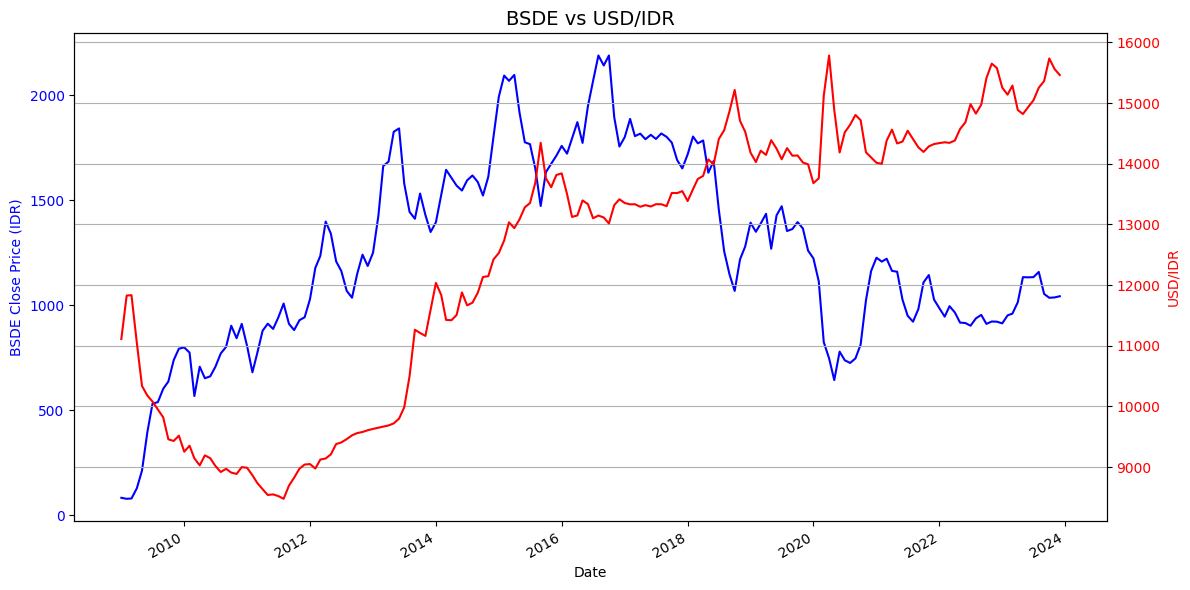

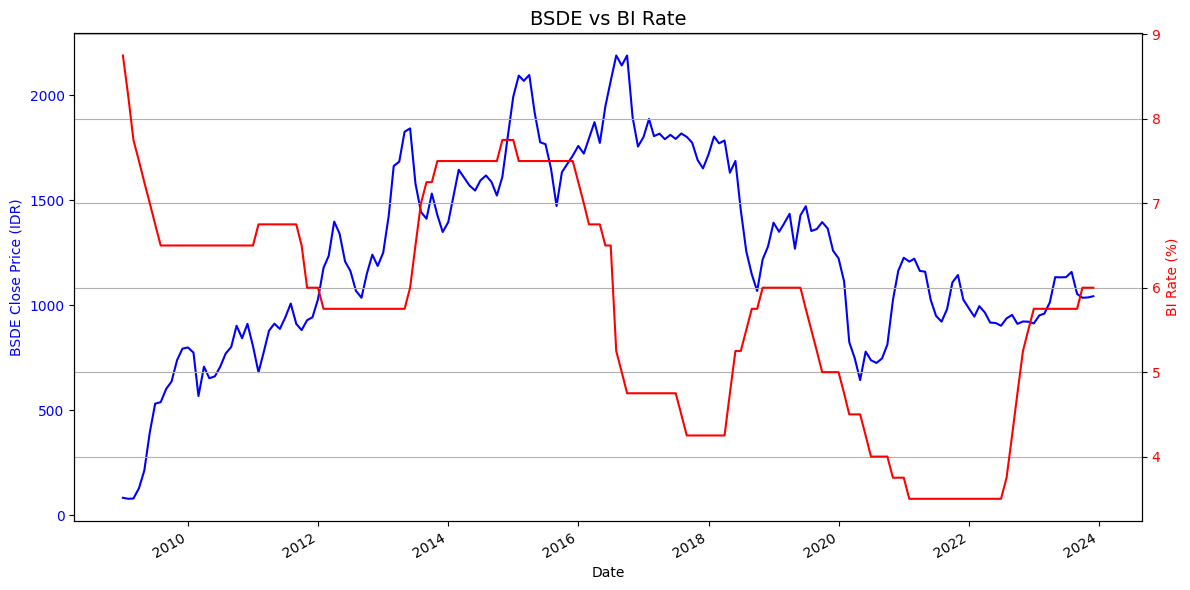

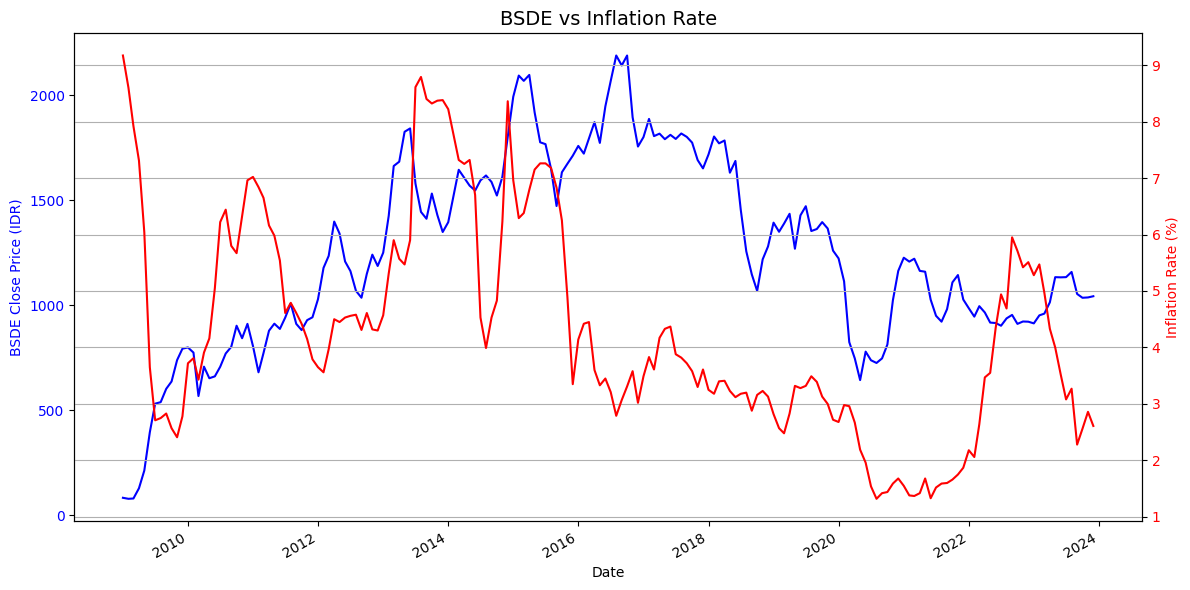

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('BSDE Close Price (IDR)', color='blue')
ax1.plot(merged_data['Date'], merged_data['Close_bsde'], label='BSDE Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('USD/IDR', color='red')
ax2.plot(merged_data['Date'], merged_data['Close_usdidr'], label='USD/IDR', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('BSDE vs USD/IDR', fontsize=14)

fig.autofmt_xdate()

plt.grid(True)
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('BSDE Close Price (IDR)', color='blue')
ax1.plot(merged_data['Date'], merged_data['Close_bsde'], label='BSDE Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('BI Rate (%)', color='red')
ax2.plot(merged_data['Date'], merged_data['BI Rate'], label='BI Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('BSDE vs BI Rate', fontsize=14)

fig.autofmt_xdate()

plt.grid(True)
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('BSDE Close Price (IDR)', color='blue')
ax1.plot(merged_data_inflasi['Date'], merged_data_inflasi['Close'], label='BSDE Close Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Inflation Rate (%)', color='red')
ax2.plot(merged_data_inflasi['Date'], merged_data_inflasi['Inflasi'], label='Inflation Rate', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('BSDE vs Inflation Rate', fontsize=14)

fig.autofmt_xdate()

plt.grid(True)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Merging Datasets for BSDE, BI Rate, and USD/IDR Data

This cell merges data for BSDE’s stock price, BI Rate, and USD/IDR exchange rate into a single DataFrame for analysis and visualization.

In [ ]:
merged_data = pd.merge(data_bsde, data_birate, on='Date', how='inner')

merged_data = pd.merge(merged_data, data_usdidr, on='Date', how='inner')

merged_data.rename(columns={
    'Close_x': 'Close BSDE',
    'Close_y': 'Close USDIDR'
}, inplace=True)
merged_data['Date'] = pd.to_datetime(merged_data['Date']).dt.strftime('%b %Y')

In [ ]:
merged_data.head()

,Date,Close BSDE,BI Rate,Close USDIDR
0,Jan 2009,82.511636,8.75,11111.045455
1,Feb 2009,77.689909,8.25,11827.550000
2,Mar 2009,79.221429,7.75,11833.545455
3,Apr 2009,127.858840,7.50,11047.136364
4,May 2009,212.158818,7.25,10338.000000


### Merging Inflation Rate Data with BSDE, BI Rate, and USD/IDR Dataset

This cell integrates the inflation rate data with the previously merged dataset, which includes BSDE’s close price, BI Rate, and USD/IDR exchange rate.

In [ ]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format='%b %Y')
data_inflasi['Date'] = pd.to_datetime(data_inflasi['Date'], format='%b %Y')

merged_data = pd.merge(merged_data, data_inflasi, on='Date', how='inner')

merged_data.rename(columns={
    'Inflasi': 'Inflasi Rate'
}, inplace=True)
merged_data['Date'] = pd.to_datetime(merged_data['Date']).dt.strftime('%b %Y')

In [ ]:
merged_data.head()

,Date,Close BSDE,BI Rate,Close USDIDR,Inflasi Rate
0,Jan 2009,82.511636,8.75,11111.045455,9.17
1,Feb 2009,77.689909,8.25,11827.550000,8.60
2,Mar 2009,79.221429,7.75,11833.545455,7.92
3,Apr 2009,127.858840,7.50,11047.136364,7.31
4,May 2009,212.158818,7.25,10338.000000,6.04


## Data Overview and Statistical Summary

In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          180 non-null    object 
 1   Close BSDE    180 non-null    float64
 2   BI Rate       180 non-null    float64
 3   Close USDIDR  180 non-null    float64
 4   Inflasi Rate  180 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.2+ KB


In [ ]:
merged_data.describe()

,Close BSDE,BI Rate,Close USDIDR,Inflasi Rate
count,180.000000,180.000000,180.000000,180.000000
mean,1245.710182,5.761111,12465.939376,4.300000
std,453.850806,1.314089,2262.974210,1.900204
min,77.689909,3.500000,8478.382643,1.320000
25%,919.848485,4.750000,9815.696414,3.015000
50%,1207.230576,5.750000,13331.386957,3.825000
75%,1635.107143,6.750000,14326.380513,5.547500
max,2188.181818,8.750000,15782.951660,9.170000


# MODEL 1 SAHAM


## Import Package

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Data preparation

### Defining Train and Label Variables for Modeling

In [ ]:
X = merged_data[['Close USDIDR', 'BI Rate', 'Inflasi Rate']].values  # Variabel independen
Y = merged_data['Close BSDE'].values  # Variabel dependen

### Data Splitting and Normalization for Training and Validation

In [ ]:
# 70% Train, 30% Val
total_size = len(X)
train_size = int(0.70 * total_size)

X_train, Y_train = X[:train_size], Y[:train_size]
X_val, Y_val = X[train_size:], Y[train_size:]

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

scaler_Y = StandardScaler()
Y_train_scaled = scaler_Y.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_val_scaled = scaler_Y.transform(Y_val.reshape(-1, 1)).flatten()


## Modelling

### Model Architecture


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='relu', kernel_regularizer=regularizers.l2(0.0001))
])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 512)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 527,873 (2.01 MB)

 Trainable params: 527,873 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

### Define Checkpoint

In [ ]:
checkpoint_filepath = 'best_model.keras'
checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min')

### Model Training

Model Compilation: Setting Optimizer, Loss Function, and Evaluation Metrics

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

Model Training: Fitting the Neural Network on Training Data


In [ ]:
history = model.fit(X_train_scaled, Y_train_scaled,
                    validation_data=(X_val_scaled, Y_val_scaled),
                    epochs=1000,
                    batch_size=32,
                    callbacks=[checkpoint])

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 1.0613 - mae: 0.8169 - mse: 0.9588 - val_loss: 4.0493 - val_mae: 1.8949 - val_mse: 3.9490
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 1.0274 - mae: 0.7657 - mse: 0.9275 - val_loss: 2.9819 - val_mae: 1.6023 - val_mse: 2.8834
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.9550 - mae: 0.7073 - mse: 0.8568 - val_loss: 2.1961 - val_mae: 1.3442 - val_mse: 2.0990
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8495 - mae: 0.6594 - mse: 0.7527 - val_loss: 2.8056 - val_mae: 1.5253 - val_mse: 2.7099
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.8713 - mae: 0.6653 - mse: 0.7759 - val_loss: 3.1023 - val_mae: 1.5824 - val_mse: 3.0079
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.7534 - mae: 0.5940 - mse: 0.6593 - val_loss: 2.5145 - val_mae: 1.3944 - val_mse: 2.4213
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8417 - mae: 0.6526 - mse: 0.7487 - val_loss:

### Visualization of Model Training Metrics

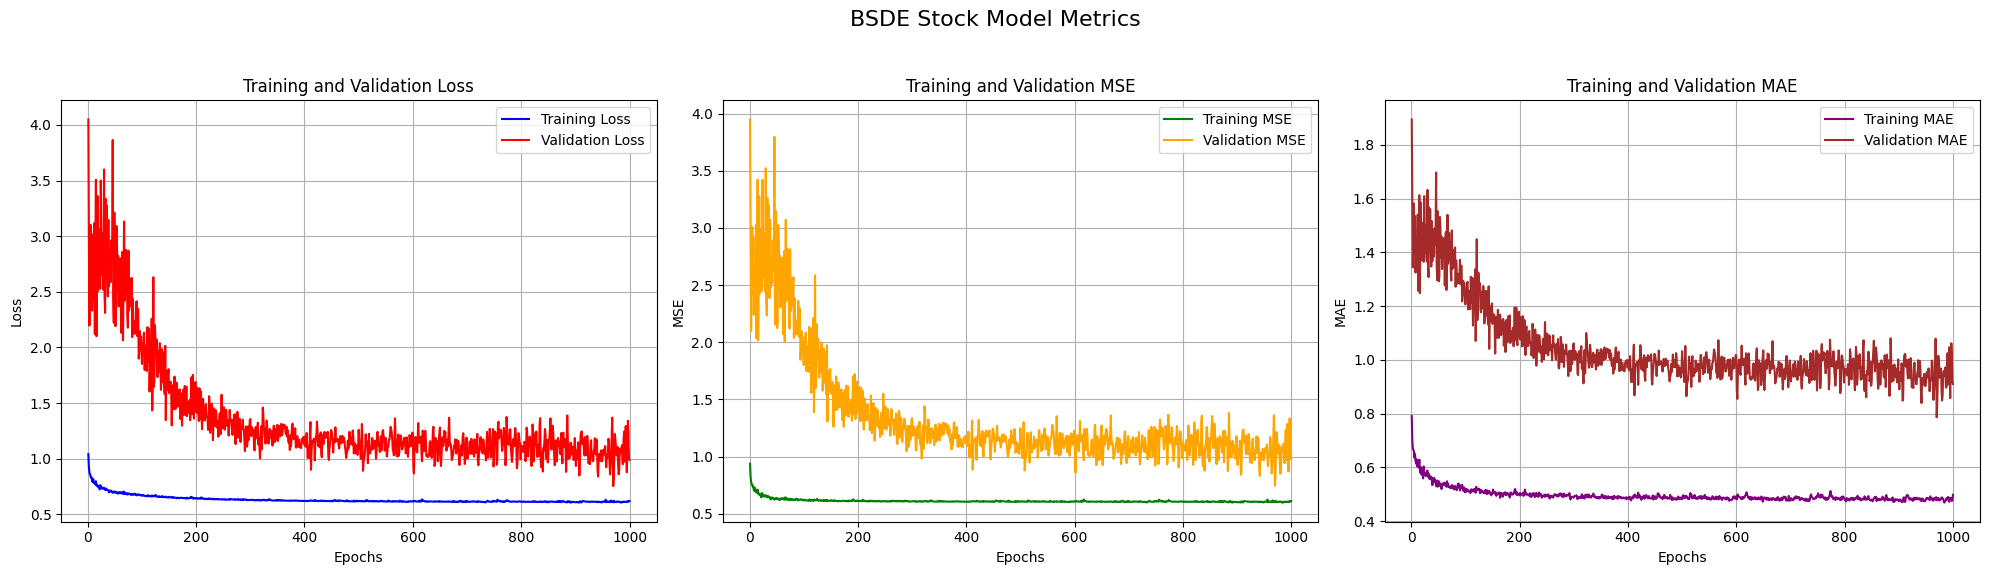

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mse = history.history['mse']
val_mse = history.history['val_mse']
mae = history.history['mae']
val_mae = history.history['val_mae']
epochs_range = range(1, len(loss) + 1)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Adjust figure size for larger plots
fig.suptitle('BSDE Stock Model Metrics', fontsize=16)


# Plot 1: Training and Validation Loss
axes[0].plot(epochs_range, loss, label='Training Loss', color='blue')
axes[0].plot(epochs_range, val_loss, label='Validation Loss', color='red')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].grid(True)

# Plot 2: Training and Validation MSE
axes[1].plot(epochs_range, mse, label='Training MSE', color='green')
axes[1].plot(epochs_range, val_mse, label='Validation MSE', color='orange')
axes[1].set_title('Training and Validation MSE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('MSE')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Training and Validation MAE
axes[2].plot(epochs_range, mae, label='Training MAE', color='purple')
axes[2].plot(epochs_range, val_mae, label='Validation MAE', color='brown')
axes[2].set_title('Training and Validation MAE')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('MAE')
axes[2].legend()
axes[2].grid(True)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap

plt.savefig('BSDE.png') # save plot
plt.show()

# Save Model Plot Matrict

In [ ]:
from google.colab import files
files.download('BSDE.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>